In [4]:
import pandas as pd

In [12]:
#Data Understanding and Summary Statistics

In [20]:
df = pd.read_excel('eda_payroll_dataset.xlsx')

In [22]:
df.head(10)

,Employee_ID,Name,Department,Position,Base_Salary,Bonus,Overtime_Hours,Overtime_Pay,Tax_Deductions,Net_Salary
0,E0001,Grace,HR,Engineer,NaN,4163.33,19.0,4380.96,4613.84,74583.16
1,E0002,David,HR,Engineer,65764.33,9394.54,49.0,3613.92,11611.08,67161.71
2,E0003,Eva,HR,Engineer,38406.72,5648.91,42.0,1159.21,7652.41,37562.43
3,E0004,Grace,Marketing,Executive,69696.49,9426.69,26.0,3527.81,7330.79,75320.20
4,E0005,Charlie,Sales,Manager,47604.83,2594.60,40.0,1538.51,2586.10,49151.84
5,E0006,Hannah,Marketing,Analyst,46805.10,7394.40,15.0,1210.87,1512.43,53897.94
6,E0007,Eva,Sales,Clerk,38463.25,6363.87,33.0,365.02,3980.28,41211.86
7,E0008,Eva,Marketing,Analyst,62100.39,7524.38,31.0,NaN,5993.73,67351.18
8,E0009,Grace,Marketing,Analyst,98173.37,2539.34,25.0,NaN,13498.53,90769.18
9,E0010,Bob,Engineering,Manager,54879.75,6817.45,24.0,NaN,15805.09,47064.61


In [24]:
df.dtypes

Employee_ID        object
Name               object
Department         object
Position           object
Base_Salary       float64
Bonus             float64
Overtime_Hours    float64
Overtime_Pay      float64
Tax_Deductions    float64
Net_Salary        float64
dtype: object

In [26]:
df.describe()

,Base_Salary,Bonus,Overtime_Hours,Overtime_Pay,Tax_Deductions,Net_Salary
count,799.000000,810.000000,896.000000,920.000000,905.000000,1000.000000
mean,78035.855594,5268.840037,24.863839,2500.626250,15251.390055,67947.263400
std,36142.587414,2726.964633,14.059705,1428.004028,8402.407227,27890.284223
min,30016.960000,512.790000,0.000000,10.380000,1018.200000,4428.430000
25%,51702.205000,2907.430000,13.000000,1276.012500,7979.770000,45452.717500
50%,77453.870000,5313.710000,24.000000,2522.685000,15428.350000,68887.255000
75%,98615.635000,7623.840000,37.000000,3732.297500,22124.250000,90716.725000
max,344143.560000,9977.420000,49.000000,4995.250000,29995.630000,125430.250000


In [28]:
summary = df.describe()

In [30]:
summary.loc['mean'] = df.mean(numeric_only=True)
summary.loc['median'] = df.median(numeric_only=True)
summary.loc['mode'] = df.mode().iloc[0]
summary.loc['std_dev'] = df.std(numeric_only=True)
summary.loc['count'] = df.count()

In [32]:
summary

,Base_Salary,Bonus,Overtime_Hours,Overtime_Pay,Tax_Deductions,Net_Salary
count,799.000000,810.000000,896.000000,920.000000,905.000000,1000.000000
mean,78035.855594,5268.840037,24.863839,2500.626250,15251.390055,67947.263400
std,36142.587414,2726.964633,14.059705,1428.004028,8402.407227,27890.284223
min,30016.960000,512.790000,0.000000,10.380000,1018.200000,4428.430000
25%,51702.205000,2907.430000,13.000000,1276.012500,7979.770000,45452.717500
50%,77453.870000,5313.710000,24.000000,2522.685000,15428.350000,68887.255000
75%,98615.635000,7623.840000,37.000000,3732.297500,22124.250000,90716.725000
max,344143.560000,9977.420000,49.000000,4995.250000,29995.630000,125430.250000
median,77453.870000,5313.710000,24.000000,2522.685000,15428.350000,68887.255000
mode,30016.960000,512.790000,44.000000,3334.680000,1018.200000,4428.430000


In [34]:
null=df.isna().sum()
null

Employee_ID         0
Name                0
Department          0
Position            0
Base_Salary       201
Bonus             190
Overtime_Hours    104
Overtime_Pay       80
Tax_Deductions     95
Net_Salary          0
dtype: int64

In [36]:
missing_values = null[null > 0]
missing_percentage = (missing_values/len(df))*100

In [38]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})
missing_summary

,Missing Values,Percentage Missing
Base_Salary,201,20.1
Bonus,190,19.0
Overtime_Hours,104,10.4
Overtime_Pay,80,8.0
Tax_Deductions,95,9.5


In [40]:
#Data Visualization

<Axes: >

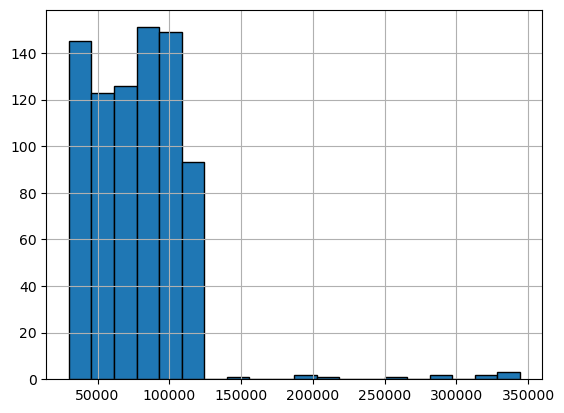

In [42]:
df['Base_Salary'].hist(bins=20, edgecolor='black')

<Axes: >

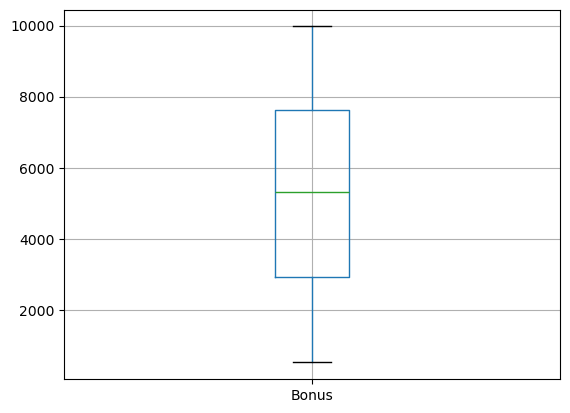

In [44]:
df.boxplot(column='Bonus')

<Axes: xlabel='Base_Salary', ylabel='Net_Salary'>

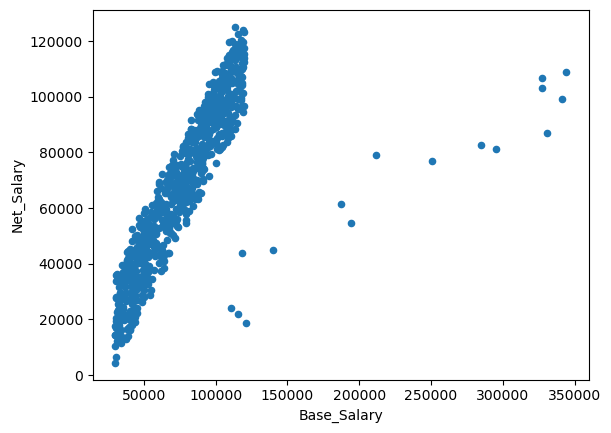

In [50]:
df.plot(kind='scatter', x='Base_Salary', y='Net_Salary')

In [52]:
numeric_columns = ['Base_Salary', 'Bonus', 'Overtime_Hours', 'Overtime_Pay', 'Tax_Deductions', 'Net_Salary']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

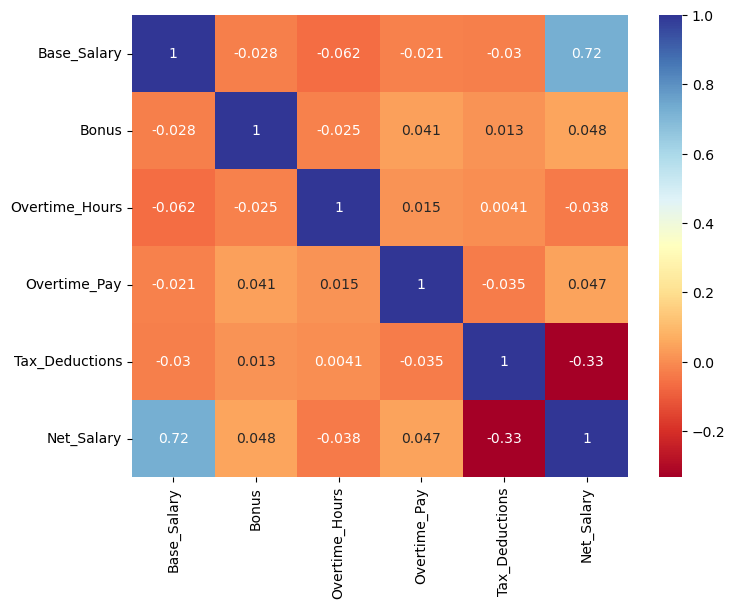

In [65]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')
plt.show()

In [68]:
#Advanced Data Visualization and Insights

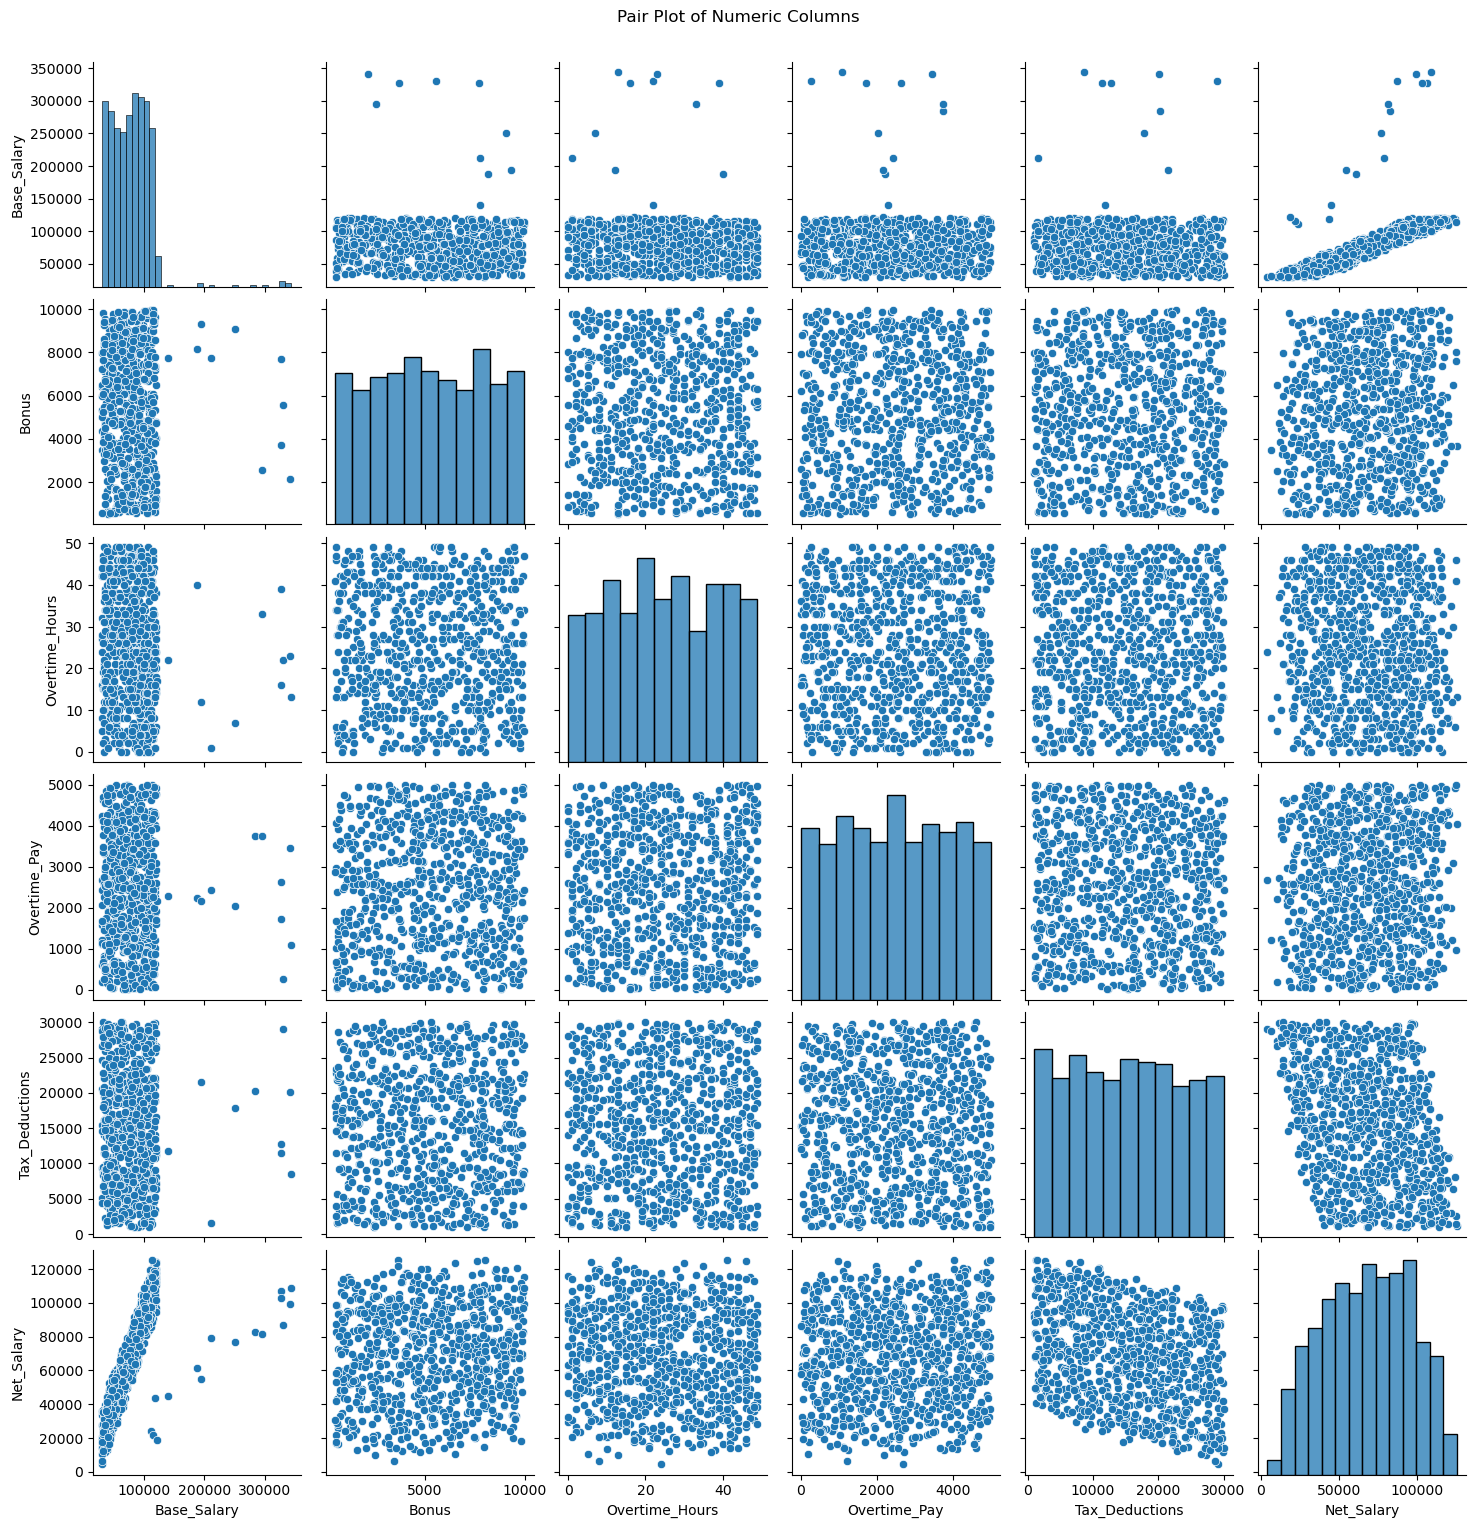

In [70]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

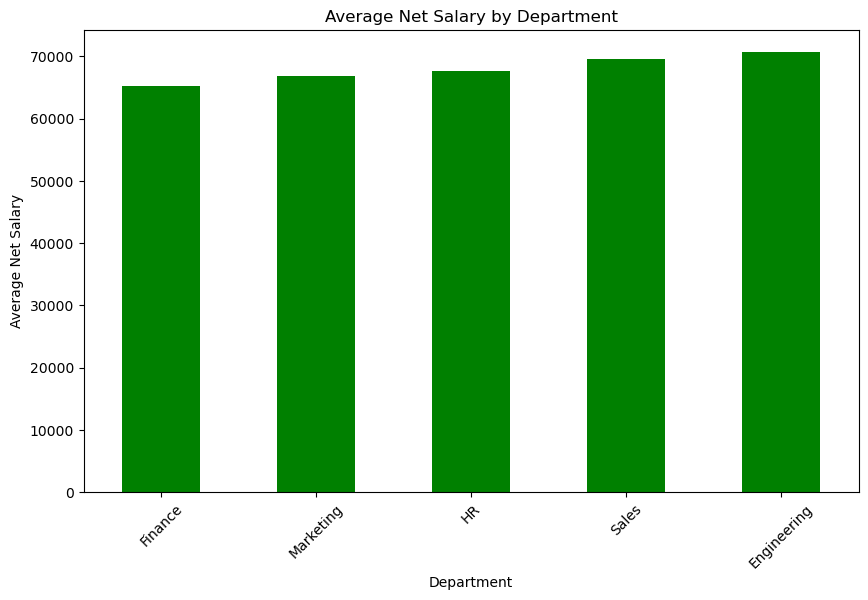

In [84]:
avg_net_salary_by_dept = df.groupby('Department')['Net_Salary'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_net_salary_by_dept.plot(kind='bar', color='green')
plt.xlabel('Department')
plt.ylabel('Average Net Salary')
plt.title('Average Net Salary by Department')
plt.xticks(rotation=45)
plt.show()

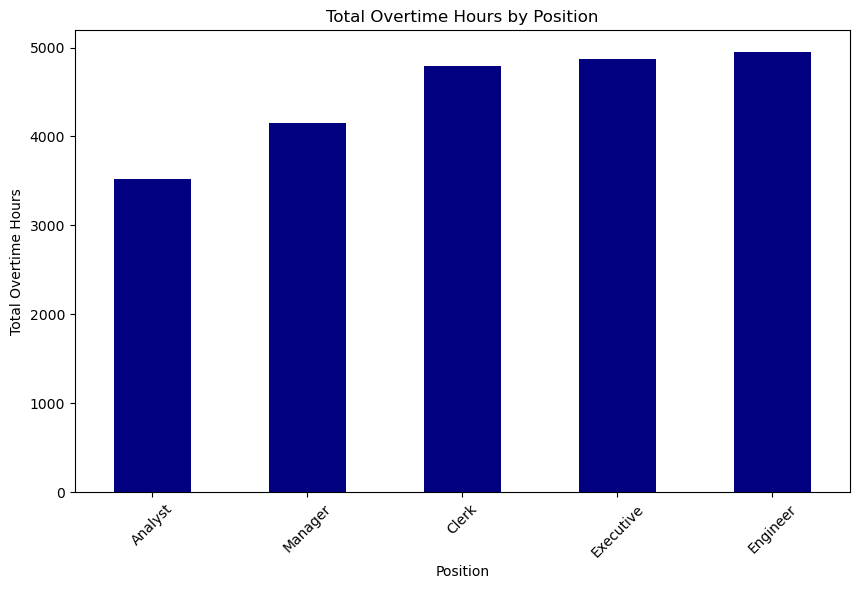

In [88]:
total_overtime_by_position = df.groupby('Position')['Overtime_Hours'].sum().sort_values()
plt.figure(figsize=(10, 6))
total_overtime_by_position.plot(kind='bar', color='Navy')
plt.xlabel('Position')
plt.ylabel('Total Overtime Hours')
plt.title('Total Overtime Hours by Position')
plt.xticks(rotation=45)
plt.show()